In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/leahchen/Documents/LHL/Final Project/Time-Series-Forecasting/data/merge_cleaned.csv')

In [3]:
df.head()

,order_id,date,payment,item_code,quantity,gift_quantity,unit_price_vat_excl,unit_cogs,unit_rrp_vat_excl,CreatedAt,...,name,group0_id,group0,category,gender,age,color,size,gross_revenue,profit
0,2000093387,2020-04-24,GOPAY_CARD,S101,1,0.0,3.506048,0.000000,3.496395,2020-04-24 21:50:00,...,- žádný výrobce -,999.0,Other,NaN,NaN,NaN,NaN,NaN,3.506048,3.506048
1,2000093387,2020-04-24,GOPAY_CARD,S113,1,0.0,-0.705913,0.000000,-0.717209,2020-04-24 21:50:00,...,- žádný výrobce -,999.0,Other,NaN,NaN,NaN,NaN,NaN,-0.705913,-0.705913
2,2000093388,2020-04-24,COD,ZB00089178,1,0.0,5.829845,2.209302,6.472868,2020-04-24 21:45:00,...,Puma,200.0,Apparel,football,unisex,adults,Silver,3,5.829845,3.620543
3,2000093388,2020-04-24,COD,ZB00138060,1,0.0,5.829845,2.209302,6.472868,2020-04-24 21:45:00,...,Puma,200.0,Apparel,football,unisex,adults,Pink,39-42,5.829845,3.620543
4,2000093388,2020-04-24,COD,ZB00015664,1,0.0,19.379845,18.731008,32.015504,2020-04-24 21:45:00,...,adidas,200.0,Apparel,fitness,men,adults,Black,XXL,19.379845,0.648837


In [5]:
# Check rows with null values in the 'group0_id' column
null_rows = df[df['group0_id'].isnull()]
null_rows.head()

,order_id,date,payment,item_code,quantity,gift_quantity,unit_price_vat_excl,unit_cogs,unit_rrp_vat_excl,CreatedAt,...,name,group0_id,group0,category,gender,age,color,size,gross_revenue,profit
1784425,2100428251,2021-10-26,GOPAY_CARD,S131,1,0.0,1.889922,0.0,1.899225,2021-10-26 17:26:00,...,- žádný výrobce -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.889922,1.889922
1784426,2100428251,2021-10-26,GOPAY_CARD,S131,1,0.0,0.608527,0.0,0.620155,2021-10-26 17:26:00,...,- žádný výrobce -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.608527,0.608527
1784435,2100428257,2021-10-26,COD,S131,1,0.0,1.889922,0.0,1.899225,2021-10-26 17:31:00,...,- žádný výrobce -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.889922,1.889922
1784436,2100428257,2021-10-26,COD,S131,1,0.0,0.608527,0.0,0.620155,2021-10-26 17:31:00,...,- žádný výrobce -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.608527,0.608527
1849323,2100461943,2021-11-15,GOPAY_CARD,S131,1,0.0,1.889922,0.0,1.899225,2021-11-15 13:43:00,...,- žádný výrobce -,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.889922,1.889922


In [6]:
df['group0_id'].fillna('999.0', inplace=True)

In [7]:
# Convert the column to a numeric type (e.g., float)
df['group0_id'] = pd.to_numeric(df['group0_id'])

# Convert the column to an integer type
df['group0_id'] = df['group0_id'].astype(int)


In [8]:
df['add_on_products'] = df['group0_id'].apply(lambda x: 1 if x == 999 else 0)


In [9]:
columns_to_fill = ['category', 'gender', 'age', 'color', 'size']
for column in columns_to_fill:
    df[column].fillna('Not Applicable', inplace=True)


In [11]:
df.head()

,order_id,date,payment,item_code,quantity,gift_quantity,unit_price_vat_excl,unit_cogs,unit_rrp_vat_excl,CreatedAt,...,group0_id,group0,category,gender,age,color,size,gross_revenue,profit,add_on_products
0,2000093387,2020-04-24,GOPAY_CARD,S101,1,0.0,3.506048,0.000000,3.496395,2020-04-24 21:50:00,...,999,Other,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,3.506048,3.506048,1
1,2000093387,2020-04-24,GOPAY_CARD,S113,1,0.0,-0.705913,0.000000,-0.717209,2020-04-24 21:50:00,...,999,Other,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,-0.705913,-0.705913,1
2,2000093388,2020-04-24,COD,ZB00089178,1,0.0,5.829845,2.209302,6.472868,2020-04-24 21:45:00,...,200,Apparel,football,unisex,adults,Silver,3,5.829845,3.620543,0
3,2000093388,2020-04-24,COD,ZB00138060,1,0.0,5.829845,2.209302,6.472868,2020-04-24 21:45:00,...,200,Apparel,football,unisex,adults,Pink,39-42,5.829845,3.620543,0
4,2000093388,2020-04-24,COD,ZB00015664,1,0.0,19.379845,18.731008,32.015504,2020-04-24 21:45:00,...,200,Apparel,fitness,men,adults,Black,XXL,19.379845,0.648837,0


In [12]:
# save this cleaned_02 to a CSV file
df.to_csv('/Users/leahchen/Documents/LHL/Final Project/Time-Series-Forecasting/data/cleaned_02.csv', index=False)

In [13]:
cleaned_df = pd.read_csv('/Users/leahchen/Documents/LHL/Final Project/Time-Series-Forecasting/data/cleaned_02.csv')
cleaned_df.head(10)

,order_id,date,payment,item_code,quantity,gift_quantity,unit_price_vat_excl,unit_cogs,unit_rrp_vat_excl,CreatedAt,...,group0_id,group0,category,gender,age,color,size,gross_revenue,profit,add_on_products
0,2000093387,2020-04-24,GOPAY_CARD,S101,1,0.0,3.506048,0.000000,3.496395,2020-04-24 21:50:00,...,999,Other,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,3.506048,3.506048,1
1,2000093387,2020-04-24,GOPAY_CARD,S113,1,0.0,-0.705913,0.000000,-0.717209,2020-04-24 21:50:00,...,999,Other,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,-0.705913,-0.705913,1
2,2000093388,2020-04-24,COD,ZB00089178,1,0.0,5.829845,2.209302,6.472868,2020-04-24 21:45:00,...,200,Apparel,football,unisex,adults,Silver,3,5.829845,3.620543,0
3,2000093388,2020-04-24,COD,ZB00138060,1,0.0,5.829845,2.209302,6.472868,2020-04-24 21:45:00,...,200,Apparel,football,unisex,adults,Pink,39-42,5.829845,3.620543,0
4,2000093388,2020-04-24,COD,ZB00015664,1,0.0,19.379845,18.731008,32.015504,2020-04-24 21:45:00,...,200,Apparel,fitness,men,adults,Black,XXL,19.379845,0.648837,0
5,2000093388,2020-04-24,COD,ZB00031201,1,0.0,9.065116,11.650000,22.403101,2020-04-24 21:45:00,...,200,Apparel,football,unisex,adults,White,14-16,9.065116,-2.584884,0
6,2000093388,2020-04-24,COD,S101,1,0.0,1.889922,0.000000,1.899225,2020-04-24 21:45:00,...,999,Other,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,1.889922,1.889922,1
7,2000093388,2020-04-24,COD,S113,1,0.0,0.929070,0.000000,0.930233,2020-04-24 21:45:00,...,999,Other,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,0.929070,0.929070,1
8,2000093389,2020-04-24,COD,ZB00055666,1,0.0,15.856201,8.604651,22.403101,2020-04-24 21:50:00,...,200,Apparel,football,unisex,kids,Black,L (159-164 cm),15.856201,7.251550,0
9,2000093389,2020-04-24,COD,S101,1,0.0,1.889922,0.000000,1.899225,2020-04-24 21:50:00,...,999,Other,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,1.889922,1.889922,1


In [58]:
cleaned_df['payment'].value_counts()

COD                    1239223
GOPAY_CARD              253683
PAYPAL                  226116
CARD_GOPAY              198793
CARD_CSOB               115234
CHECKOUT_CARD            84398
PAYPAL_EXPRESS            5318
CHECKOUT_APPLE            2626
CHECKOUT_IDEAL            1388
CHECKOUT_BANCONTACT        551
BANK_TRANSFER              356
CASH                        72
CSOB_CARD                   26
INVOICE_HUF                  9
PAYPAL_IDEALO                6
Name: payment, dtype: int64

In [14]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127799 entries, 0 to 2127798
Data columns (total 23 columns):
 #   Column               Dtype  
---  ------               -----  
 0   order_id             int64  
 1   date                 object 
 2   payment              object 
 3   item_code            object 
 4   quantity             int64  
 5   gift_quantity        float64
 6   unit_price_vat_excl  float64
 7   unit_cogs            float64
 8   unit_rrp_vat_excl    float64
 9   CreatedAt            object 
 10  country              object 
 11  brand_id             int64  
 12  name                 object 
 13  group0_id            int64  
 14  group0               object 
 15  category             object 
 16  gender               object 
 17  age                  object 
 18  color                object 
 19  size                 object 
 20  gross_revenue        float64
 21  profit               float64
 22  add_on_products      int64  
dtypes: float64(6), int64(5), object(

### Feature Engineering

In [15]:
# add different date features
# Ensure the 'date' column is in datetime format
cleaned_df['date'] = pd.to_datetime(cleaned_df['date'])
cleaned_df['CreatedAt'] = pd.to_datetime(cleaned_df['CreatedAt'])

In [16]:
# Extract day of the week (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
cleaned_df['day_of_week'] = cleaned_df['date'].dt.dayofweek

In [17]:
# Extract month of the year (1 = January, 2 = February, ..., 12 = December)
cleaned_df['month_of_year'] = cleaned_df['date'].dt.month

In [18]:
# Create a column for the hour of the day (0-23)
cleaned_df['hour_of_day'] = cleaned_df['CreatedAt'].dt.hour

In [19]:
cleaned_df['year'] = cleaned_df['date'].dt.year

In [20]:
cleaned_df['week_of_year'] = cleaned_df['date'].dt.isocalendar().week

In [21]:
# Price difference feature
cleaned_df['price_difference'] = cleaned_df['unit_price_vat_excl'] - cleaned_df['unit_rrp_vat_excl']


In [22]:
# Create time-based features: morning (1 if 5 <= hour < 12, else 0), afternoon (1 if 12 <= hour < 17, else 0), and evening (1 if 17 <= hour < 22, else 0)
cleaned_df['morning'] = cleaned_df['hour_of_day'].apply(lambda x: 1 if 5 <= x < 12 else 0)
cleaned_df['afternoon'] = cleaned_df['hour_of_day'].apply(lambda x: 1 if 12 <= x < 17 else 0)
cleaned_df['evening'] = cleaned_df['hour_of_day'].apply(lambda x: 1 if 17 <= x < 22 else 0)


In [23]:
# create Total sales per country with product category
total_sales_country_product = cleaned_df.groupby(['country', 'category'])['gross_revenue'].sum().reset_index()
total_sales_country_product.columns = ['country', 'category', 'total_sales_country_product']
cleaned_df = cleaned_df.merge(total_sales_country_product, on=['country', 'category'], how='left')


In [24]:
# create Average sales per country with product category
avg_sales_country_product = cleaned_df.groupby(['country', 'category'])['gross_revenue'].mean().reset_index()
avg_sales_country_product.columns = ['country', 'category', 'avg_sales_country_product']
cleaned_df = cleaned_df.merge(avg_sales_country_product, on=['country', 'category'], how='left')


In [25]:
# create monthly Total sales per country with product category
total_sales_country_product_month = cleaned_df.groupby(['country', 'category', 'month_of_year'])['gross_revenue'].sum().reset_index()
total_sales_country_product_month.columns = ['country', 'category', 'month_of_year', 'total_sales_country_product_month']
cleaned_df = cleaned_df.merge(total_sales_country_product_month, on=['country', 'category', 'month_of_year'], how='left')


In [26]:
# create daily Average sales per country with product category
avg_sales_country_product_day = cleaned_df.groupby(['country', 'category', 'day_of_week'])['gross_revenue'].mean().reset_index()
avg_sales_country_product_day.columns = ['country', 'category', 'day_of_week', 'avg_sales_country_product_day']
cleaned_df = cleaned_df.merge(avg_sales_country_product_day, on=['country', 'category', 'day_of_week'], how='left')


In [31]:
# round those numeric columns
columns_to_round = ['unit_price_vat_excl', 'unit_cogs', 'unit_rrp_vat_excl', 'price_difference', 'total_sales_country_product', 'avg_sales_country_product', 'total_sales_country_product_month', 'avg_sales_country_product_day']
rounded_df = cleaned_df.copy()
for col in columns_to_round:
    rounded_df[col] = cleaned_df[col].round(2)

rounded_df.head()


,order_id,date,payment,item_code,quantity,gift_quantity,unit_price_vat_excl,unit_cogs,unit_rrp_vat_excl,CreatedAt,...,year,week_of_year,price_difference,morning,afternoon,evening,total_sales_country_product,avg_sales_country_product,total_sales_country_product_month,avg_sales_country_product_day
0,2000093387,2020-04-24,GOPAY_CARD,S101,1,0.0,3.51,0.00,3.50,2020-04-24 21:50:00,...,2020,17,0.01,0,0,1,215037.02,1.61,14268.25,1.56
1,2000093387,2020-04-24,GOPAY_CARD,S113,1,0.0,-0.71,0.00,-0.72,2020-04-24 21:50:00,...,2020,17,0.01,0,0,1,215037.02,1.61,14268.25,1.56
2,2000093388,2020-04-24,COD,ZB00089178,1,0.0,5.83,2.21,6.47,2020-04-24 21:45:00,...,2020,17,-0.64,0,0,1,9275270.79,38.07,526599.68,38.15
3,2000093388,2020-04-24,COD,ZB00138060,1,0.0,5.83,2.21,6.47,2020-04-24 21:45:00,...,2020,17,-0.64,0,0,1,9275270.79,38.07,526599.68,38.15
4,2000093388,2020-04-24,COD,ZB00015664,1,0.0,19.38,18.73,32.02,2020-04-24 21:45:00,...,2020,17,-12.64,0,0,1,1749344.59,25.37,118211.77,25.31


In [32]:
# Save this updated DataFrame to a CSV file
rounded_df.to_csv('/Users/leahchen/Documents/LHL/Final Project/Time-Series-Forecasting/data/cleaned_03.csv', index=False)

In [33]:
import warnings

In [53]:
correlations = rounded_df.corr(method='pearson')

/var/folders/zv/fr0wdk0579q6_dc92zfqx36w0000gn/T/ipykernel_17918/2299593529.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = rounded_df.corr(method='pearson')


In [54]:
# Calculate the correlation matrix
corr_matrix = np.abs(rounded_df.corr())

# Get the correlation values for the target variable
target_corr = corr_matrix['gross_revenue']

# Set a threshold for selecting features based on correlation
threshold = 0.1

# Select features with a correlation greater than the threshold
selected_features_corr = target_corr[target_corr > threshold].index


/var/folders/zv/fr0wdk0579q6_dc92zfqx36w0000gn/T/ipykernel_17918/338196188.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = np.abs(rounded_df.corr())


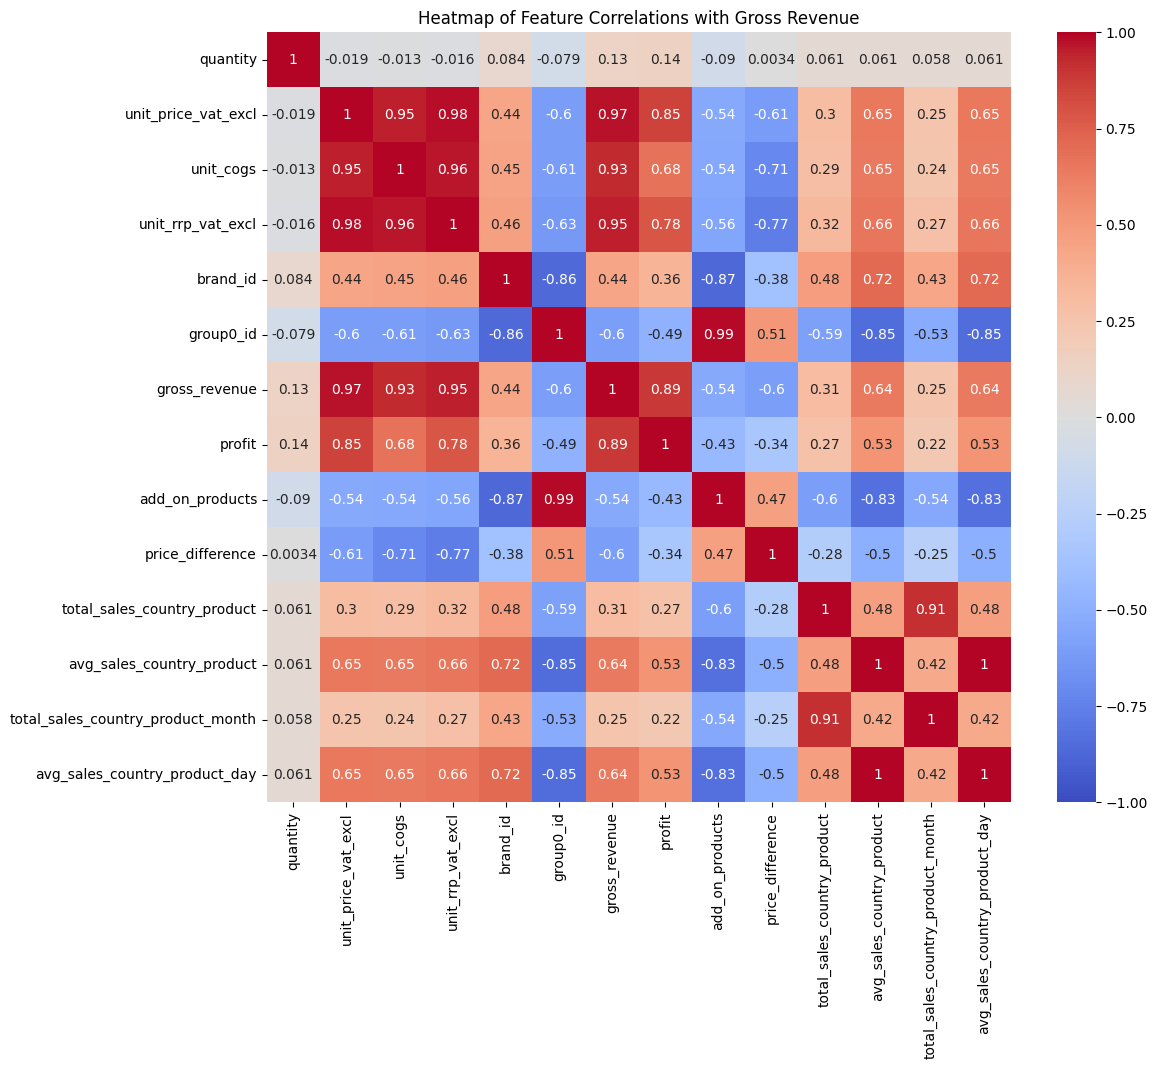

In [55]:
import seaborn as sns

# Create a new DataFrame with only the selected features and the target variable
selected_df = rounded_df[selected_features_corr].copy()
selected_df['gross_revenue'] = rounded_df['gross_revenue']

# Calculate the correlation matrix for the selected DataFrame
selected_corr_matrix = selected_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Feature Correlations with Gross Revenue')

# Display the heatmap
plt.show()


In [38]:
rounded_df.columns

Index(['order_id', 'date', 'payment', 'item_code', 'quantity', 'gift_quantity',
       'unit_price_vat_excl', 'unit_cogs', 'unit_rrp_vat_excl', 'CreatedAt',
       'country', 'brand_id', 'name', 'group0_id', 'group0', 'category',
       'gender', 'age', 'color', 'size', 'gross_revenue', 'profit',
       'add_on_products', 'day_of_week', 'month_of_year', 'hour_of_day',
       'year', 'week_of_year', 'price_difference', 'morning', 'afternoon',
       'evening', 'total_sales_country_product', 'avg_sales_country_product',
       'total_sales_country_product_month', 'avg_sales_country_product_day'],
      dtype='object')

### Hypothesis testing related to gross revenue and profit

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [40]:
# Countries
country_revenue_anova = stats.f_oneway(*[group['gross_revenue'].values for _, group in rounded_df.groupby('country')])
country_profit_anova = stats.f_oneway(*[group['profit'].values for _, group in rounded_df.groupby('country')])
print("ANOVA results for gross revenue by country:")
print(country_revenue_anova)
print("\nANOVA results for profit by country:")
print(country_profit_anova)

ANOVA results for gross revenue by country:
F_onewayResult(statistic=9336.904152980556, pvalue=0.0)

ANOVA results for profit by country:
F_onewayResult(statistic=6291.712042161192, pvalue=0.0)


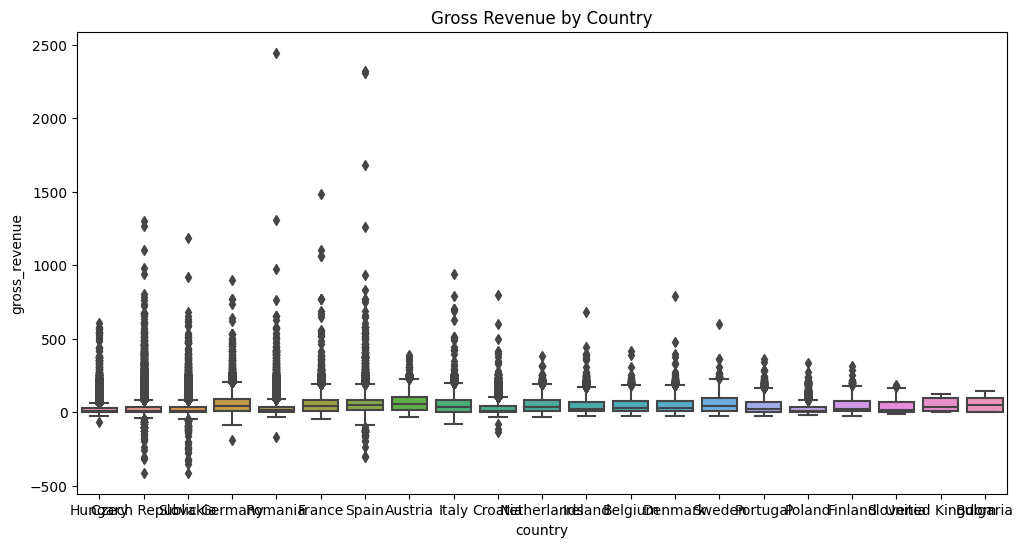

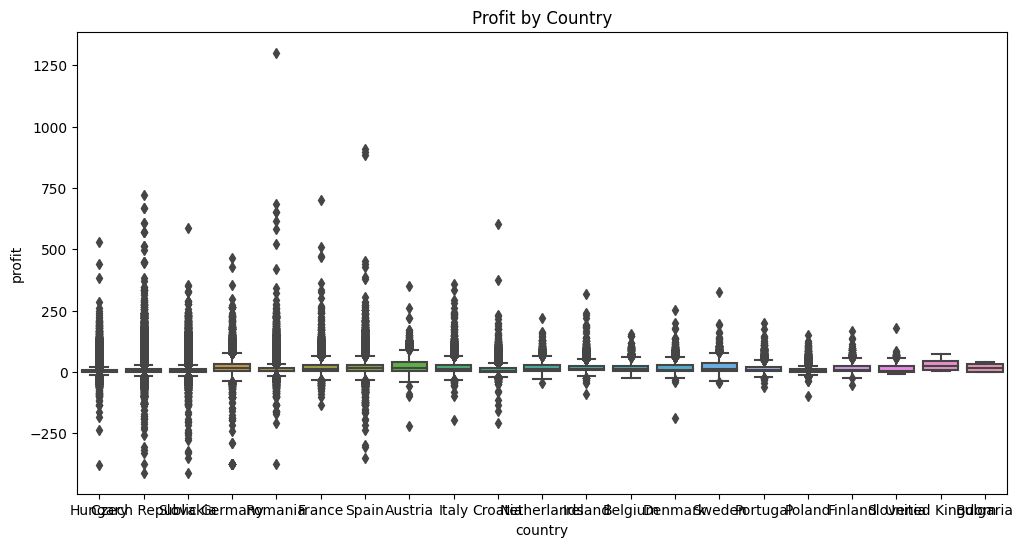

In [41]:
# Gross revenue and profit by country
plt.figure(figsize=(12, 6))
sns.boxplot(data=rounded_df, x='country', y='gross_revenue')
plt.title('Gross Revenue by Country')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=rounded_df, x='country', y='profit')
plt.title('Profit by Country')
plt.show()

In [42]:
# Categories
category_revenue_anova = stats.f_oneway(*[group['gross_revenue'].values for _, group in rounded_df.groupby('category')])
category_profit_anova = stats.f_oneway(*[group['profit'].values for _, group in rounded_df.groupby('category')])
print("ANOVA results for gross revenue by category:")
print(category_revenue_anova)
print("\nANOVA results for profit by category:")
print(category_profit_anova)

ANOVA results for gross revenue by category:
F_onewayResult(statistic=341576.8753077661, pvalue=0.0)

ANOVA results for profit by category:
F_onewayResult(statistic=189244.66301048544, pvalue=0.0)


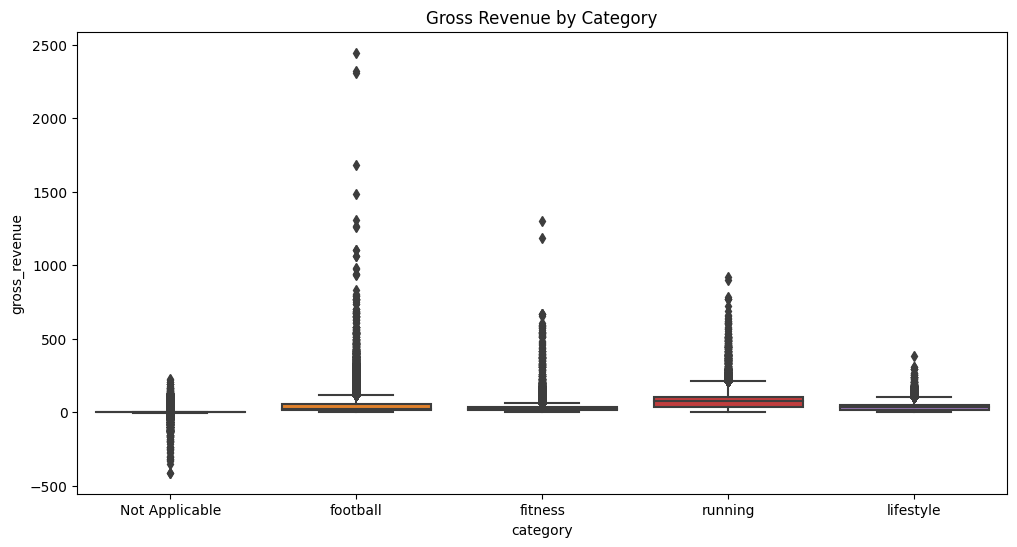

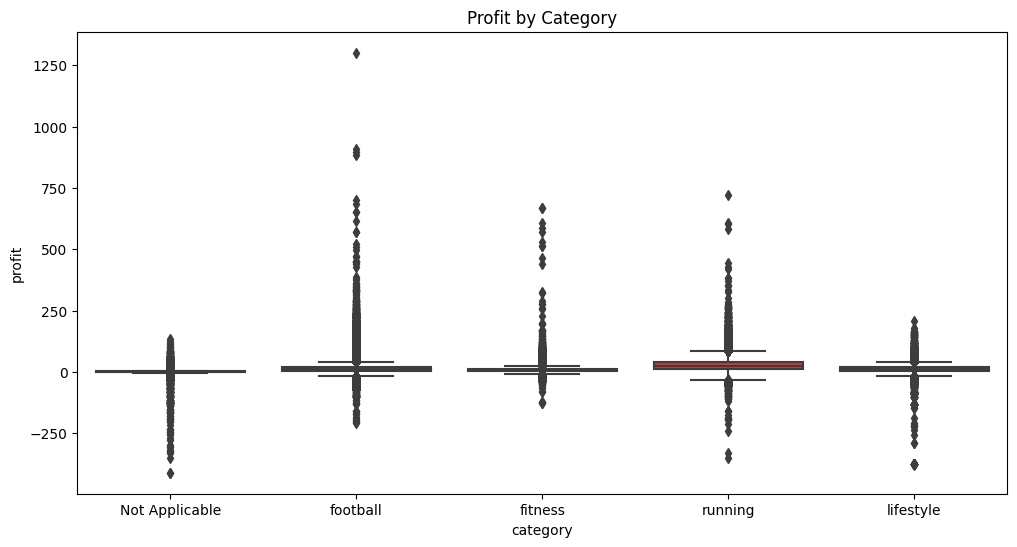

In [43]:
# Gross revenue and profit by category
plt.figure(figsize=(12, 6))
sns.boxplot(data=rounded_df, x='category', y='gross_revenue')
plt.title('Gross Revenue by Category')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_df, x='category', y='profit')
plt.title('Profit by Category')
plt.show()

In [44]:
# Age groups
age_revenue_anova = stats.f_oneway(*[group['gross_revenue'].values for _, group in rounded_df.groupby('age')])
age_profit_anova = stats.f_oneway(*[group['profit'].values for _, group in rounded_df.groupby('age')])
print("ANOVA results for gross revenue by age:")
print(age_revenue_anova)
print("\nANOVA results for profit by age:")
print(age_profit_anova)

ANOVA results for gross revenue by age:
F_onewayResult(statistic=448222.9561463709, pvalue=0.0)

ANOVA results for profit by age:
F_onewayResult(statistic=252249.7184990719, pvalue=0.0)


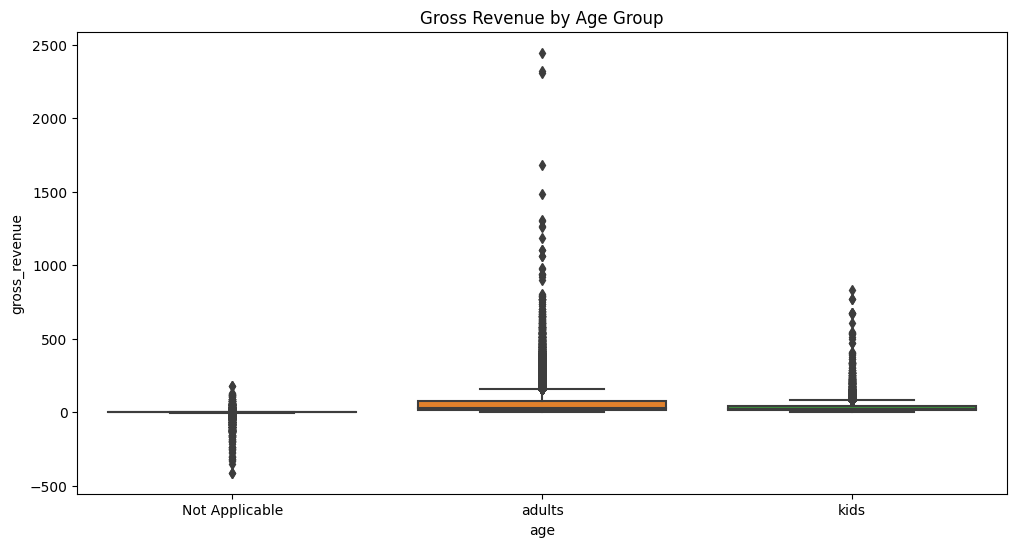

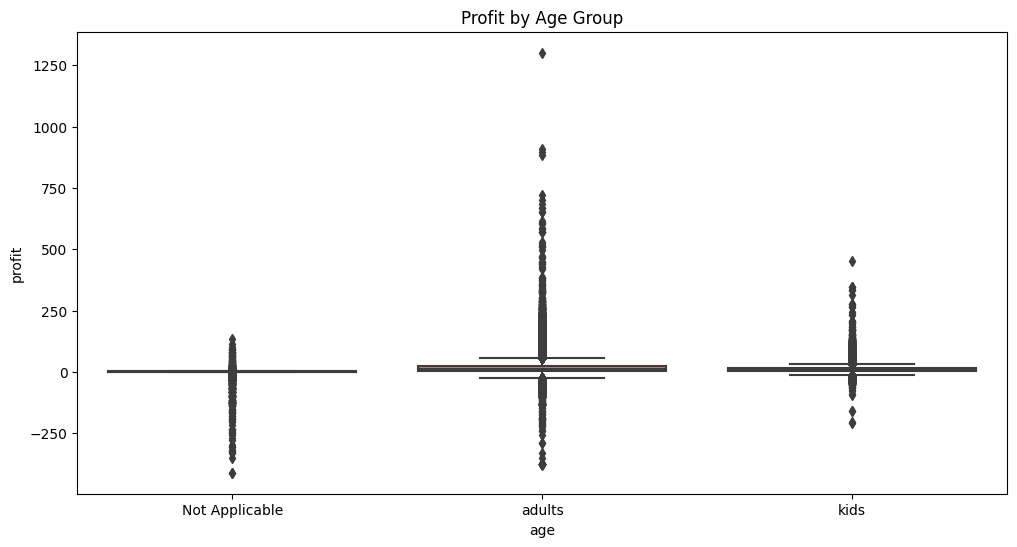

In [45]:
# Gross revenue and profit by age groups
plt.figure(figsize=(12, 6))
sns.boxplot(data=rounded_df, x='age', y='gross_revenue')
plt.title('Gross Revenue by Age Group')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=rounded_df, x='age', y='profit')
plt.title('Profit by Age Group')
plt.show()


In [47]:
# Days of the week
months_revenue_anova = stats.f_oneway(*[group['gross_revenue'].values for _, group in rounded_df.groupby('month_of_year')])
months_profit_anova = stats.f_oneway(*[group['profit'].values for _, group in rounded_df.groupby('month_of_year')])
print("ANOVA results for gross revenue by months:")
print(months_revenue_anova)
print("\nANOVA results for profit by months:")
print(months_profit_anova)

ANOVA results for gross revenue by months:
F_onewayResult(statistic=509.19956489421185, pvalue=0.0)

ANOVA results for profit by months:
F_onewayResult(statistic=744.445352408686, pvalue=0.0)


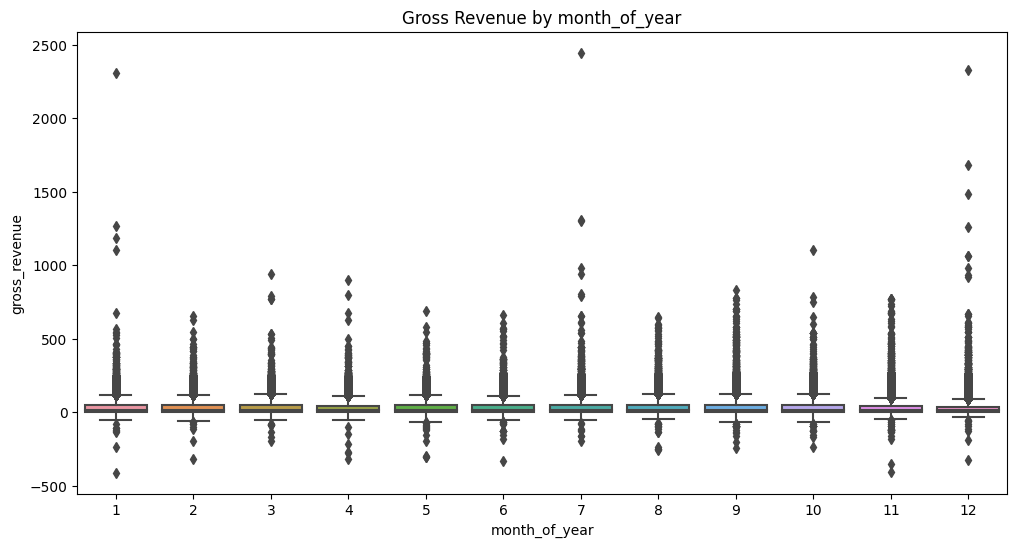

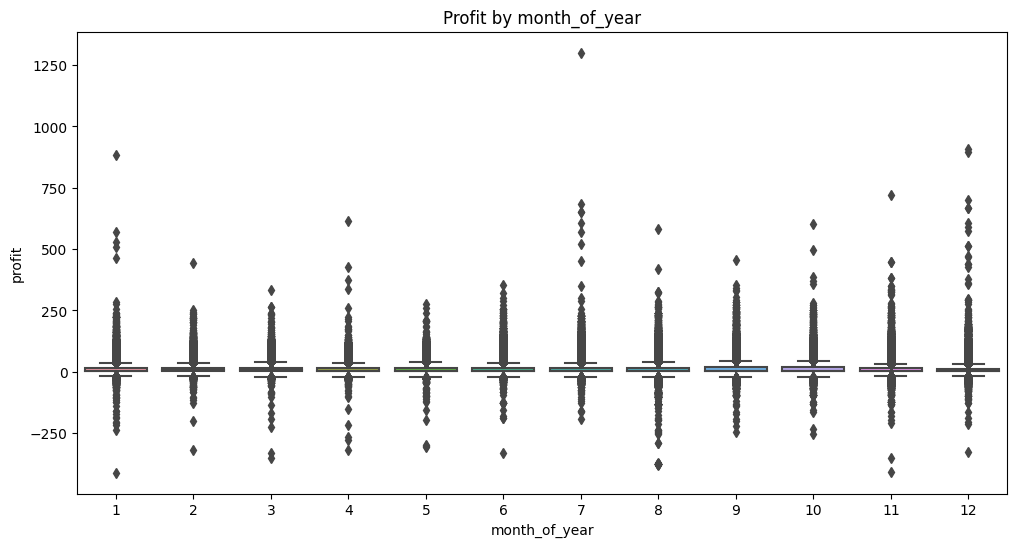

In [46]:
# Gross revenue and profit by days of the week
plt.figure(figsize=(12, 6))
sns.boxplot(data=rounded_df, x='month_of_year', y='gross_revenue')
plt.title('Gross Revenue by month_of_year')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=rounded_df, x='month_of_year', y='profit')
plt.title('Profit by month_of_year')
plt.show()

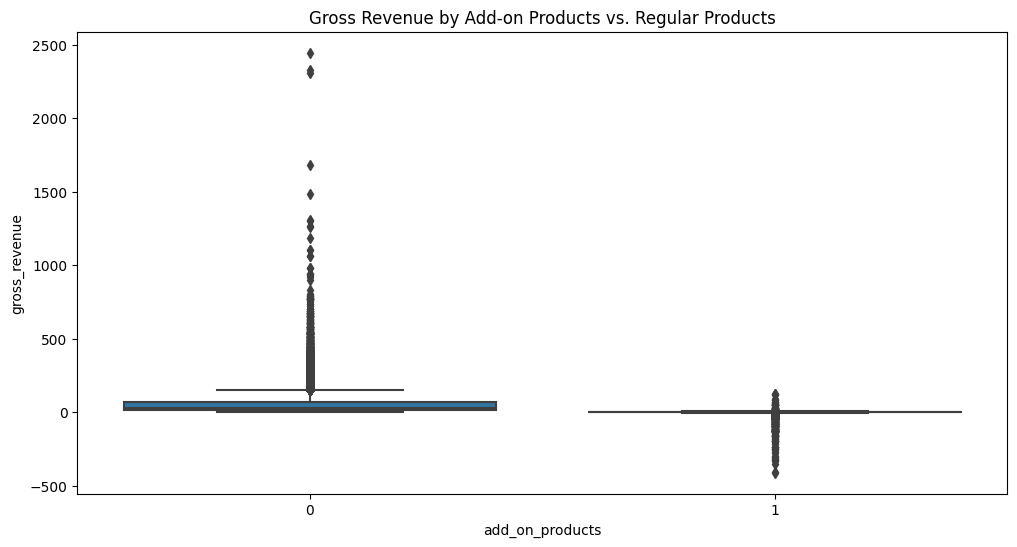

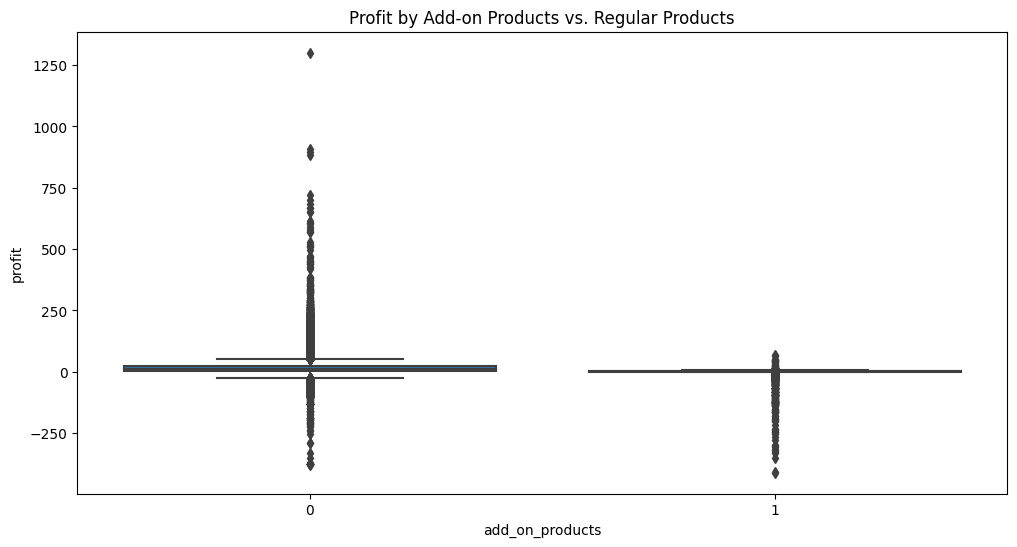

In [48]:
# Gross revenue and profit by add-on products
plt.figure(figsize=(12, 6))
sns.boxplot(data=rounded_df, x='add_on_products', y='gross_revenue')
plt.title('Gross Revenue by Add-on Products vs. Regular Products')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=rounded_df, x='add_on_products', y='profit')
plt.title('Profit by Add-on Products vs. Regular Products')
plt.show()


- For all the tests I've done, the p-values are 0.0, which means that the differences between the group means are highly significant. In other words, there is a significant difference in gross revenue and profit across different months, age groups, and countries.